In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

# Gibbs sampler

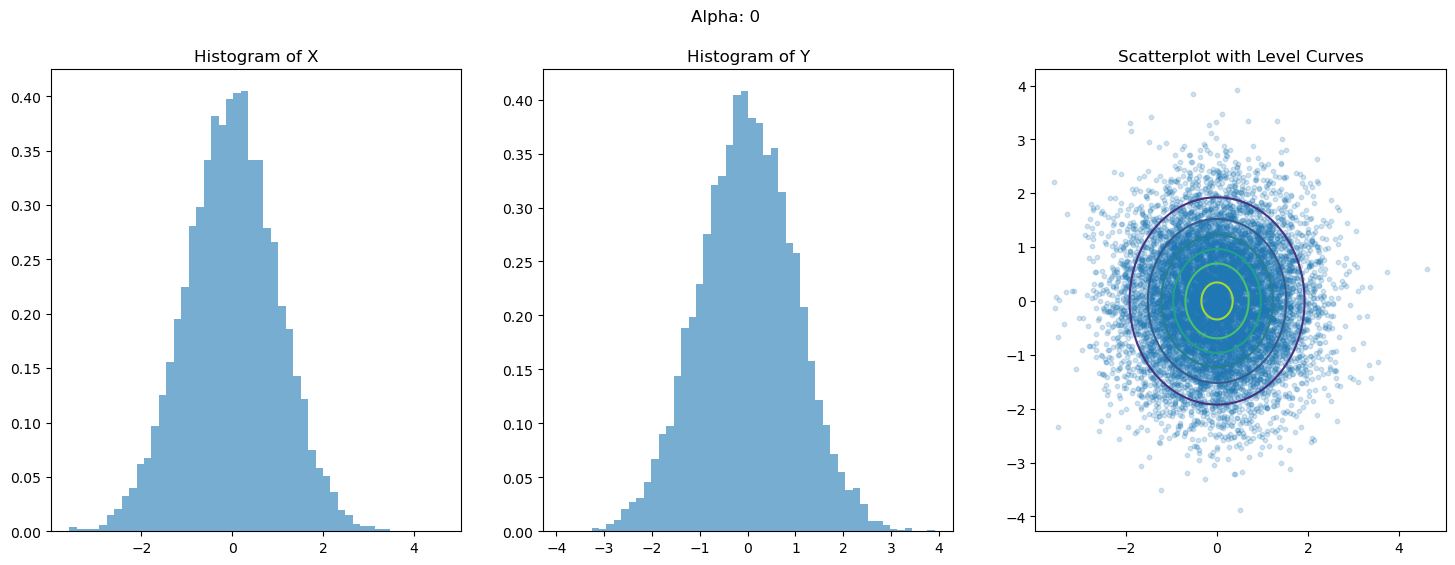

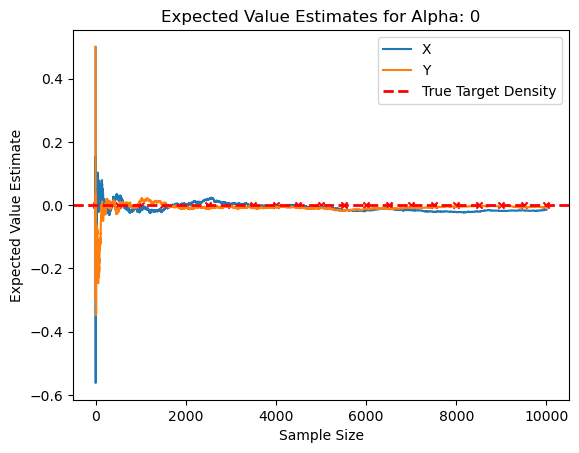

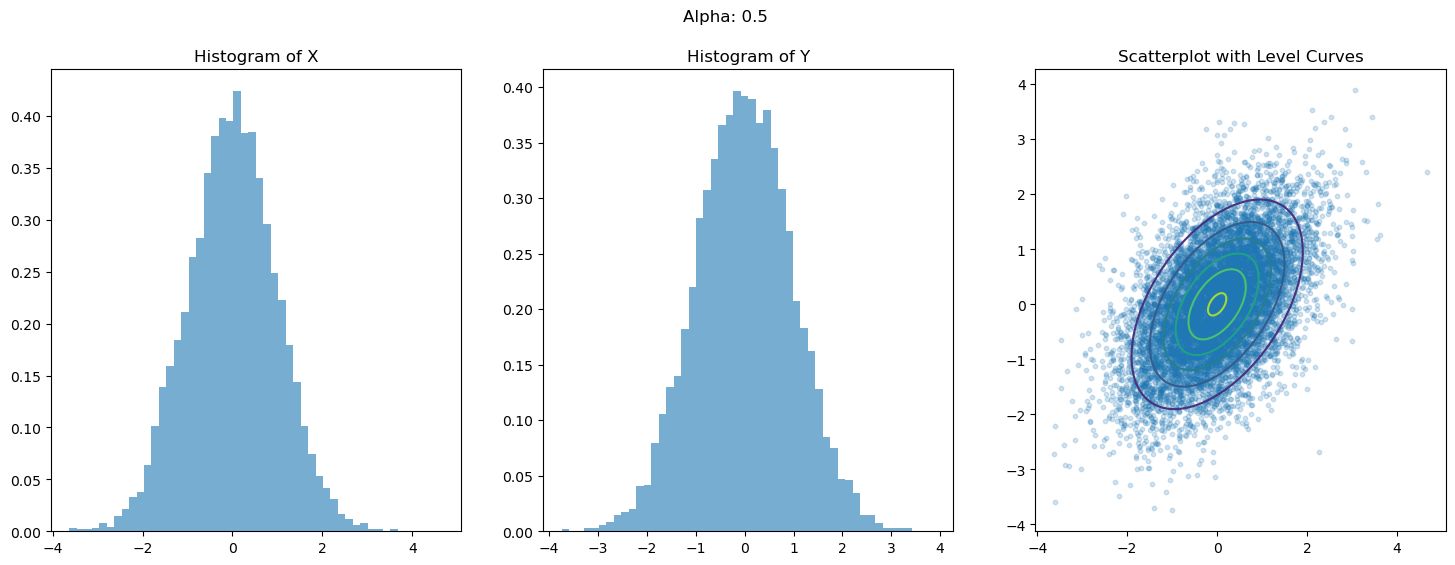

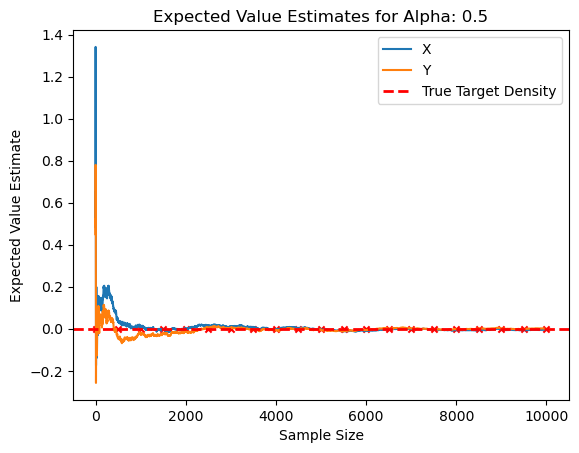

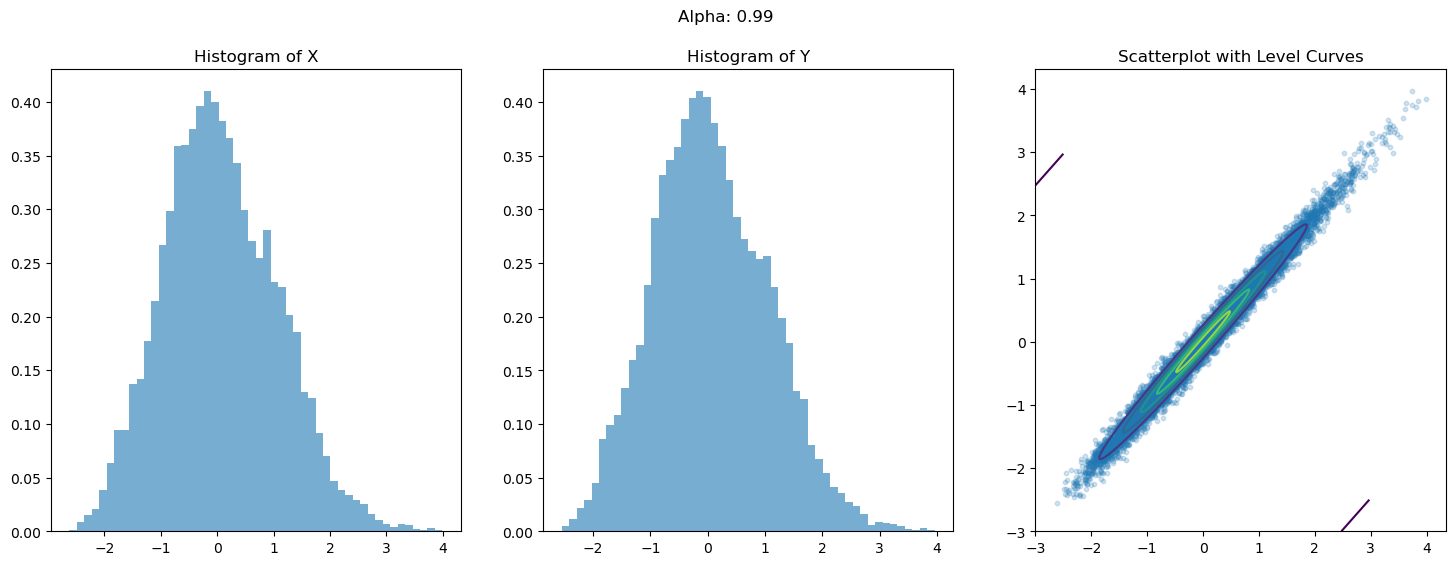

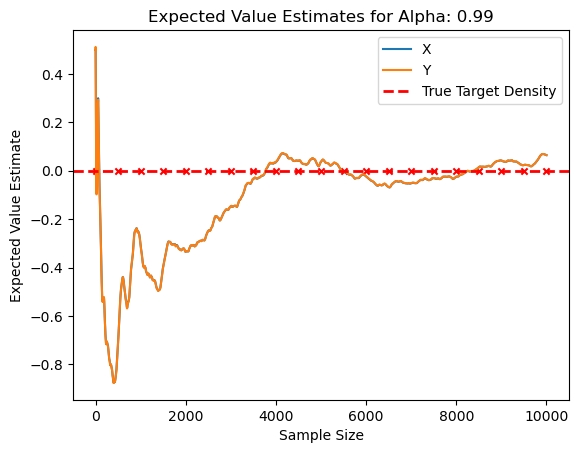

In [5]:
def bivariate_normal_pdf(x, y, alpha):
    # Set mean = np.array([0, 0]) and cov = np.array([[1, alpha], [alpha, 1]])
    return multivariate_normal([0, 0], [[1, alpha], [alpha, 1]]).pdf([x, y])

def conditional_x_given_y(y, alpha):
    return norm(0 + alpha * y, np.sqrt(1 - alpha**2))

def conditional_y_given_x(x, alpha):
    return norm(0 + alpha * x, np.sqrt(1 - alpha**2))

# Sample sequentially for j
def gibbs_sampler(alpha, N, init=(0.5, 0.5)):
    x, y = init
    samples = [(x, y)]
    for i in range(N):
        x = conditional_x_given_y(y, alpha).rvs()
        y = conditional_y_given_x(x, alpha).rvs()
        samples.append((x, y))
    return np.array(samples)

# Run through required alphas and numbers of samples
alphas = [0, 0.5, 0.99]
N = 10000

for alpha in alphas:
    # Generate samples
    samples = gibbs_sampler(alpha, N)
    # Plot the histogram
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Alpha: {alpha}")
    axes[0].hist(samples[:, 0], bins=50, density=True, alpha=0.6)
    axes[0].set_title("Histogram of X")
    axes[1].hist(samples[:, 1], bins=50, density=True, alpha=0.6)
    axes[1].set_title("Histogram of Y")
    # Plot the scatterplot with density curves
    axes[2].scatter(samples[:, 0], samples[:, 1], alpha=0.2, s=10)
    axes[2].set_title("Scatterplot with Level Curves")
    x = np.arange(-3, 3, 0.025)
    y = np.arange(-3, 3, 0.025)
    X, Y = np.meshgrid(x, y)
    Z = np.array([bivariate_normal_pdf(x, y, alpha) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
    axes[2].contour(X, Y, Z, 6)
    plt.show()
    # Plot the estimate of expected values
    estimates = np.cumsum(samples, axis=0) / np.arange(1, N + 2)[:, np.newaxis]
    plt.plot(estimates[:, 0], label="X")
    plt.plot(estimates[:, 1], label="Y")
    # Add true target density as a line with 'x' markers all along the line
    marker_indices = np.arange(0, N+1, 500)  # Adjust the step (e.g., 500) to control the density of the markers
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label='True Target Density')
    plt.scatter(marker_indices, np.zeros_like(marker_indices), color='red', marker='x', s=20)
    plt.xlabel("Sample Size")
    plt.ylabel("Expected Value Estimate")
    plt.legend()
    plt.title(f"Expected Value Estimates for Alpha: {alpha}")
    plt.show()
